## Coding Problem #0601

### "NLP Classification Analysis."

#### Answer the following questions by providing Python code:
#### Objectives:
- Pre-processing of text data.
- Create a TF IDF representation.
- Carry out the predictive analysis using the Naive Bayes algorithm. 

In [2]:
import numpy as np
import re
import nltk
nltk.download('stopwords')
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from nltk.corpus import stopwords
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
warnings.filterwarnings('ignore')               # Turn the warnings off.

[nltk_data] Downloading package stopwords to /home/dedsec/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Read in data:
Movie review data from Cornell CS department. <br>
- The data can be found [here](https://www.cs.cornell.edu/people/pabo/movie-review-data). <br>
- Download the “polarity dataset” and unzip. <br>
- Under the "txt_sentoken” folder, there are “pos” and “neg" subfolders. <br>

In [3]:
# Specify the folder and read in the subfolders.
reviews = load_files('txt_sentoken/txt_sentoken/')
my_docs, y = reviews.data, reviews.target

In [4]:
len(my_docs)

2000

In [5]:
np.unique(y, return_counts=True)

(array([0, 1]), array([1000, 1000]))

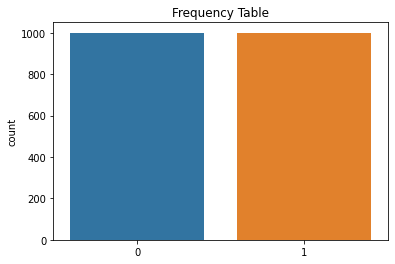

In [6]:
# Visualize the response variable.
sns.countplot(y).set_title("Frequency Table")
plt.show()

1). Carry out the data pre-processing:

In [7]:
#clean
def cleantxt(txt):
    
    stpw = stopwords.words('english')    
    txt=txt.decode('utf-8')
    txt = re.sub(r"\n", " ", txt)
    txt = re.sub("[\<\[].*?[\>\]]", " ", txt)
    txt = txt.lower()
    txt = re.sub(r"[^a-z ]", " ", txt)
    txt = re.sub(r"\b\w{1,3}\b", " ",txt)
    txt = " ".join([x for x in txt.split() if x not in stpw])
    
    return txt

docs = list(map(cleantxt, my_docs))

#split
X_train, X_test, y_train, y_test = train_test_split(docs, y, test_size=0.2, random_state=123)


2). Create a TF IDF representation.

In [8]:
vect = TfidfVectorizer(decode_error='ignore',stop_words='english')
train_tfidf = vect.fit_transform(X_train)
test_tfidf = vect.transform(X_test)


3). Apply the Naive Bayes algorithm. Calculate the accuracy.

In [9]:
nb = GaussianNB()
nb.fit(train_tfidf.toarray(), y_train)

GaussianNB()

In [10]:
y_pred_nb = nb.predict(test_tfidf.toarray())
nbAcc=accuracy_score(y_test, y_pred_nb)
nbAcc 


0.64